In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import dlc_bci as bci
from dlc_practical_prologue import *

import torch
from torch import nn
from torch.nn import functional as F
from torch.autograd import Variable

Load dataset

In [2]:
tr_input, tr_target = bci.load("bci", train=True, one_khz=True)
te_input, te_target = bci.load("bci", train=False, one_khz=True)
tr_target = convert_to_one_hot_labels(tr_input, tr_target)
te_target = convert_to_one_hot_labels(te_input, te_target)

Standardize

In [3]:
tr_input = torch.nn.functional.normalize(tr_input, p=2, dim=0) 
te_input = torch.nn.functional.normalize(te_input, p=2, dim=0) 

tr_input, tr_target = Variable(tr_input.view(-1,28*500)), Variable(tr_target)
te_input, te_target = Variable(te_input.view(-1,28*500)), Variable(te_target)

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 500, 1000)
        self.fc2 = nn.Linear(1000, 200)
        self.fc3 = nn.Linear(200, 2)
        
    def forward(self, x, mode=False):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
# construct and train model
model = Net()
tr_loss, te_loss = bci.train_model(model, tr_input, tr_target, 4, te_input, te_target, 4, 25)
torch.save(model.state_dict(), os.getcwd() + "v1.pth")

# compute train and test errors
nb_tr_errors = bci.compute_nb_errors(model, tr_input, tr_target, 4)
nb_te_errors = bci.compute_nb_errors(model, te_input, te_target, 4)

print('tr error {:0.2f}% {:d}/{:d}'.format((100 * nb_tr_errors) / tr_input.size(0), nb_tr_errors, tr_input.size(0)))
print('te error {:0.2f}% {:d}/{:d}'.format((100 * nb_te_errors) / te_input.size(0), nb_te_errors, te_input.size(0)))

epoch 0 tr loss 80.98 te loss 26.20
epoch 1 tr loss 80.55 te loss 26.39
epoch 2 tr loss 80.38 te loss 27.12
epoch 3 tr loss 80.02 te loss 30.30
epoch 4 tr loss 79.57 te loss 37.36
epoch 5 tr loss 78.82 te loss 49.23
epoch 6 tr loss 78.00 te loss 58.67
epoch 7 tr loss 76.98 te loss 65.09
epoch 8 tr loss 76.18 te loss 68.73
epoch 9 tr loss 75.10 te loss 68.13
epoch 10 tr loss 73.88 te loss 64.51
epoch 11 tr loss 72.57 te loss 63.72
epoch 12 tr loss 71.31 te loss 68.39
epoch 13 tr loss 69.40 te loss 70.57
epoch 14 tr loss 67.00 te loss 74.43
epoch 15 tr loss 66.87 te loss 69.88
epoch 16 tr loss 64.54 te loss 74.43
epoch 17 tr loss 60.64 te loss 63.90
epoch 18 tr loss 60.50 te loss 72.35
epoch 19 tr loss 56.99 te loss 65.49
epoch 20 tr loss 60.85 te loss 89.79
epoch 21 tr loss 55.45 te loss 75.91
epoch 22 tr loss 56.00 te loss 84.89
epoch 23 tr loss 52.47 te loss 71.76
epoch 24 tr loss 53.34 te loss 81.32
tr error 41.14% 130/316
te error 45.00% 45/100


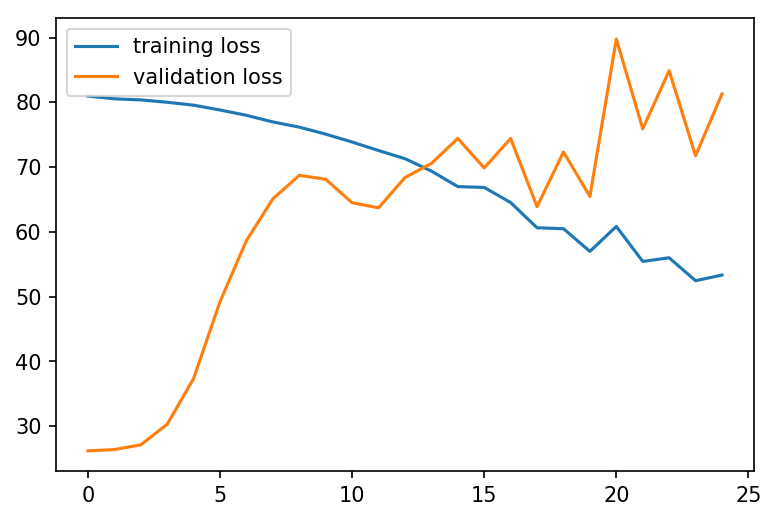

In [6]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

plt.figure()
plt.plot(tr_loss, label='training loss')
plt.plot(te_loss, label='validation loss')
plt.legend(loc='upper left')